# Importing Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style="whitegrid")

# Load The Dataset

In [25]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Data Cleaning & Understanding

In [27]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df['length'] = df['message'].apply(len)

df.isnull().sum()
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   label      5572 non-null   str  
 1   message    5572 non-null   str  
 2   label_num  5572 non-null   int64
 3   length     5572 non-null   int64
dtypes: int64(2), str(2)
memory usage: 174.3 KB


# Exploratory Data Analysis (EDA)

1. Class Distribution

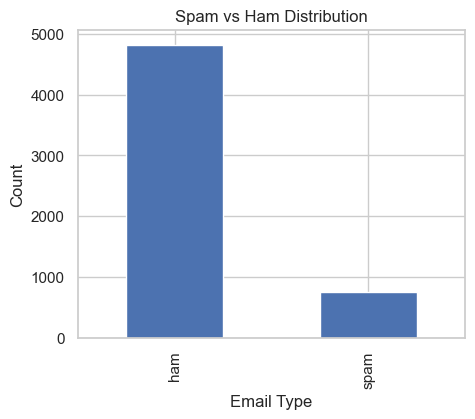

In [29]:
plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

2. Email Length Distribution

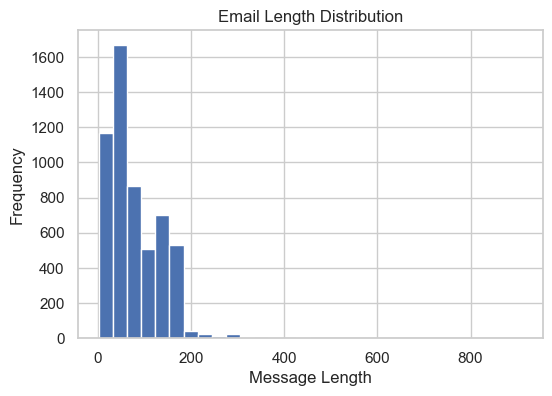

In [30]:
plt.figure(figsize=(6,4))
plt.hist(df['length'], bins=30)
plt.title("Email Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

3. Top 15 Most Frequent Words in Ham Emails

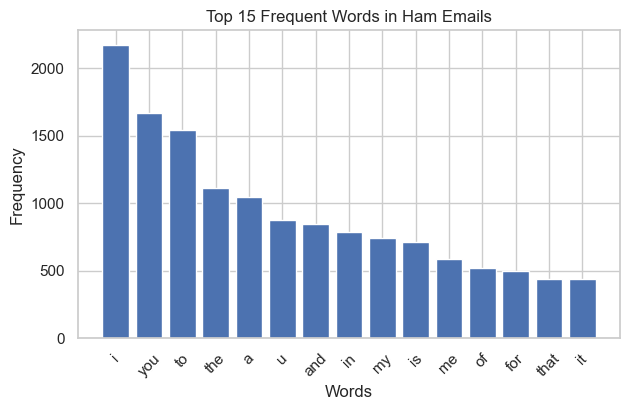

In [31]:
ham_words = " ".join(df[df['label'] == 'ham']['message']).lower().split()
common_ham_words = Counter(ham_words).most_common(15)

words = [w[0] for w in common_ham_words]
counts = [w[1] for w in common_ham_words]

plt.figure(figsize=(7,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 15 Frequent Words in Ham Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

4. Top 15 Most Frequent Words in Spam Emails

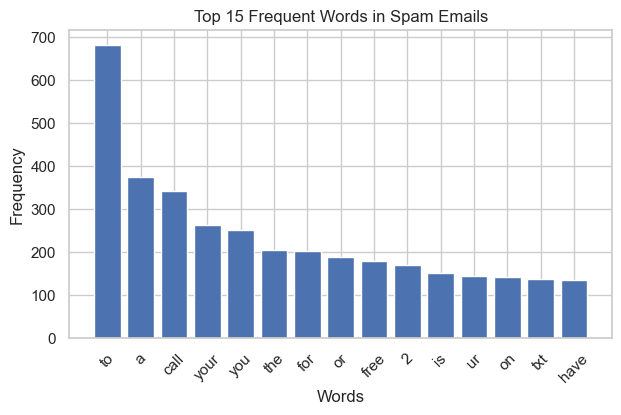

In [32]:
spam_words = " ".join(df[df['label'] == 'spam']['message']).lower().split()
common_spam_words = Counter(spam_words).most_common(15)

words = [w[0] for w in common_spam_words]
counts = [w[1] for w in common_spam_words]

plt.figure(figsize=(7,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 15 Frequent Words in Spam Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


5. Character Length vs Word Count

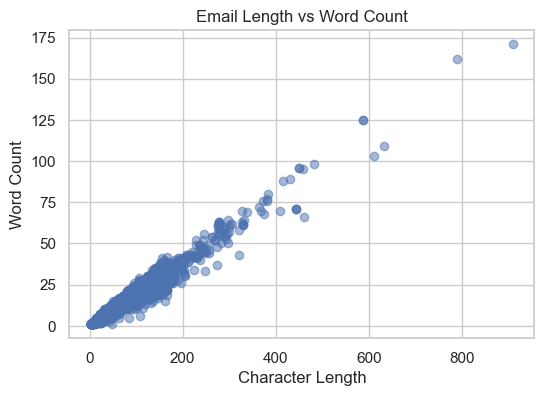

In [33]:
df['word_count'] = df['message'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
plt.scatter(df['length'], df['word_count'], alpha=0.5)
plt.title("Email Length vs Word Count")
plt.xlabel("Character Length")
plt.ylabel("Word Count")
plt.show()

# Feature Engineering (TF-IDF Vectorization) & Train Split

In [34]:
X = df['message']
y = df['label_num']

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)

# Model Training

1. Naive Bayes Model

In [36]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb)*100)

Naive Bayes Accuracy: 99.19282511210761


2. Logistic Regression

In [41]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)*100)

Logistic Regression Accuracy: 97.04035874439462


Model Evaluation

In [42]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       972
           1       1.00      0.77      0.87       143

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       972
           1       1.00      0.94      0.97       143

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# Prediction on New Email Data

In [43]:
def predict_spam(email_text):
    email_vec = vectorizer.transform([email_text])
    pred = lr.predict(email_vec)[0]                 
    prob = lr.predict_proba(email_vec)[0][1]      
    
    label = "Spam" if pred == 1 else "Not Spam"
    return label, prob

In [44]:
test_emails = [
    "Congratulations! You have won a free iPhone. Click the link to claim now.",
    "Hi, can we reschedule our meeting to tomorrow afternoon?",
    "Limited time offer! Get 50% discount on your next purchase.",
    "Please find the attached report for last week's performance."
]

for email in test_emails:
    label, prob = predict_spam(email)
    print(f"Email: {email}")
    print(f"Prediction: {label} | Spam Probability: {prob:.2f}\n")

Email: Congratulations! You have won a free iPhone. Click the link to claim now.
Prediction: Spam | Spam Probability: 0.63

Email: Hi, can we reschedule our meeting to tomorrow afternoon?
Prediction: Not Spam | Spam Probability: 0.04

Email: Limited time offer! Get 50% discount on your next purchase.
Prediction: Not Spam | Spam Probability: 0.25

Email: Please find the attached report for last week's performance.
Prediction: Not Spam | Spam Probability: 0.10



# Visualization on Model Predictions

1. Spam Probability for New Emails

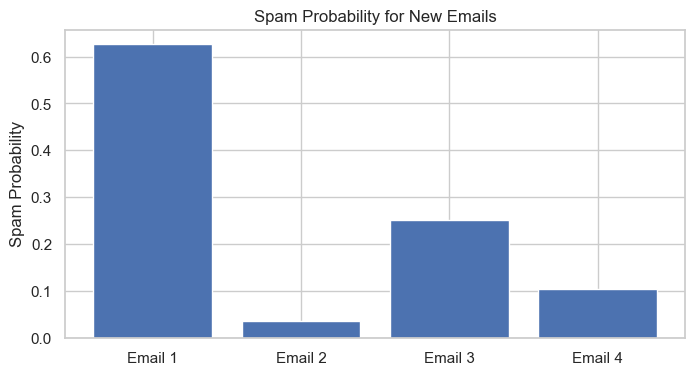

In [45]:
test_emails = [
    "Congratulations! You have won a free iPhone. Click the link to claim now.",
    "Hi, can we reschedule our meeting to tomorrow afternoon?",
    "Limited time offer! Get 50% discount on your next purchase.",
    "Please find the attached report for last week's performance."
]

labels = []
probs = []

for email in test_emails:
    label, prob = predict_spam(email)
    labels.append(label)
    probs.append(prob)

plt.figure(figsize=(8,4))
plt.bar(range(len(test_emails)), probs)
plt.xticks(range(len(test_emails)), [f"Email {i+1}" for i in range(len(test_emails))], rotation=0)
plt.ylabel("Spam Probability")
plt.title("Spam Probability for New Emails")
plt.show()

2. Spam Probability Trend

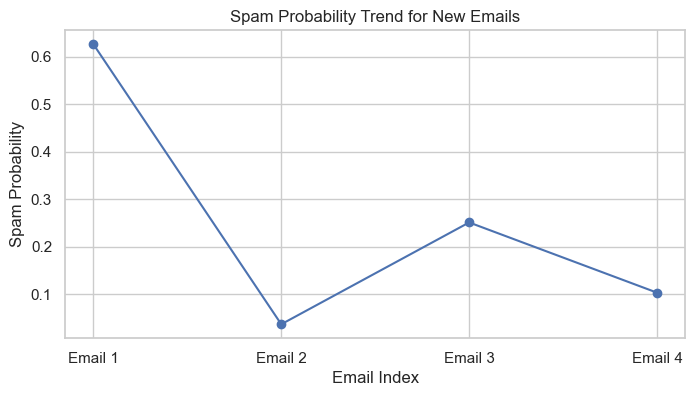

In [46]:
plt.figure(figsize=(8,4))
plt.plot(probs, marker='o')
plt.xticks(range(len(test_emails)), [f"Email {i+1}" for i in range(len(test_emails))])
plt.ylabel("Spam Probability")
plt.xlabel("Email Index")
plt.title("Spam Probability Trend for New Emails")
plt.show()

3. Spam vs Not Spam Count

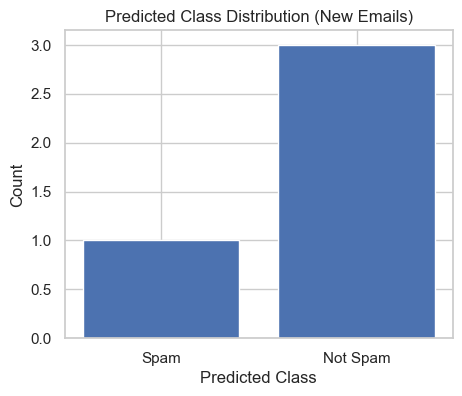

In [47]:
pred_counts = Counter(labels)

plt.figure(figsize=(5,4))
plt.bar(pred_counts.keys(), pred_counts.values())
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Predicted Class Distribution (New Emails)")
plt.show()

4. Table View

In [48]:
results_df = pd.DataFrame({
    "Email": test_emails,
    "Predicted Class": labels,
    "Spam Probability": probs
})

results_df

,Email,Predicted Class,Spam Probability
0,Congratulations! You have won a free iPhone. C...,Spam,0.625933
1,"Hi, can we reschedule our meeting to tomorrow ...",Not Spam,0.036729
2,Limited time offer! Get 50% discount on your n...,Not Spam,0.250961
3,Please find the attached report for last week'...,Not Spam,0.103213


5. Threshold Sensitivity Analysis

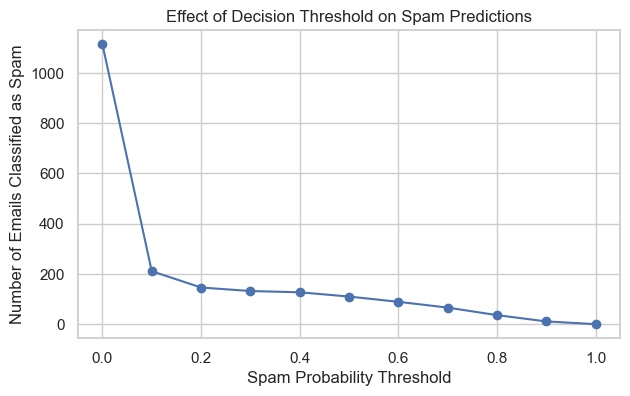

In [49]:
thresholds = np.linspace(0, 1, 11)
spam_counts = []

y_prob_test = lr.predict_proba(X_test)[:, 1]

for t in thresholds:
    preds = (y_prob_test >= t).astype(int)
    spam_counts.append(preds.sum())

plt.figure(figsize=(7,4))
plt.plot(thresholds, spam_counts, marker='o')
plt.xlabel("Spam Probability Threshold")
plt.ylabel("Number of Emails Classified as Spam")
plt.title("Effect of Decision Threshold on Spam Predictions")
plt.show()

6. Cumulative Gains Curve

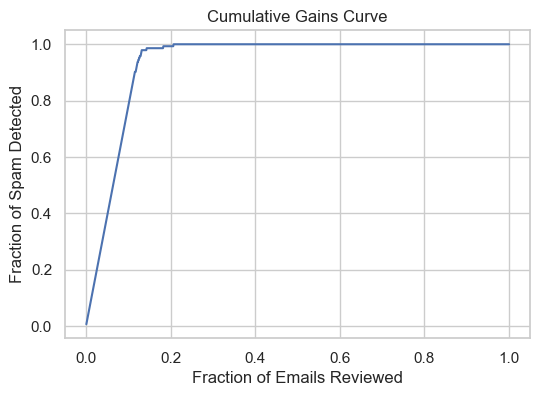

In [50]:
order = np.argsort(-y_prob_test)
y_sorted = y_test.values[order]
cum_spam = np.cumsum(y_sorted)
perc = np.arange(1, len(y_sorted) + 1) / len(y_sorted)

plt.figure(figsize=(6,4))
plt.plot(perc, cum_spam / cum_spam[-1])
plt.xlabel("Fraction of Emails Reviewed")
plt.ylabel("Fraction of Spam Detected")
plt.title("Cumulative Gains Curve")
plt.show()